<a href="https://colab.research.google.com/github/kyungmin0101/medical_ai/blob/main/0222/medicalAI_fin_gahii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
import csv
import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/MedicalAI/Refractive Index Measurements New/*/*/{}*".format('W')
df_list = []
fd_list = []
cl_list = []

for file in glob.glob(path, recursive = True) :
  df = pd.read_csv(file, skiprows=24)

  df_list.append(df)
  fd_list.append(float(file.split('/')[-2]))

  if float(file.split('/')[-2]) < 1.3 :
    cl_list.append('Normal Tissue')

  elif float(file.split('/')[-2]) >= 1.3 and float(file.split('/')[-2]) <= 1.32 :
    cl_list.append('CIN-1')

  elif float(file.split('/')[-2]) >= 1.33 and float(file.split('/')[-2]) <= 1.37 :
    cl_list.append('CIN-2')

  elif float(file.split('/')[-2]) >= 1.38 and float(file.split('/')[-2]) <= 1.39 :
    cl_list.append('CIN-3')

  elif float(file.split('/')[-2]) > 1.39 :
    cl_list.append('Cervical Cancer')

(462, 6300, 2)
(462,)
(462,)


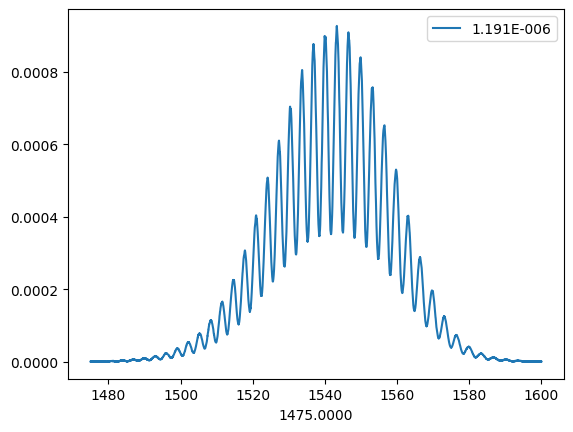

In [66]:
df_list[0].astype(float).plot(x=0, y=1)
print(np.array(df_list).shape)
print(np.array(cl_list).shape)
print(np.array(fd_list).shape)

In [ ]:
!pip install -U scikit-learn
!pip install lightgbm

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score, classification_report
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVR
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from lightgbm import LGBMRegressor,LGBMClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import time

# split the data
x_train, x_test, y_train, y_test = train_test_split(df_list, cl_list, test_size=0.1)
x2_train, x2_test, y2_train, y2_test = train_test_split(df_list, fd_list, test_size=0.1)

#reshape
nsamples, nx, ny = np.array(x_train).shape
d2_x_train = np.array(x_train).reshape((nsamples,nx*ny))

nsamples, nx, ny = np.array(x_test).shape
d2_x_test = np.array(x_test).reshape((nsamples,nx*ny))

nsamples, nx, ny = np.array(x2_train).shape
d2_x2_train = np.array(x2_train).reshape((nsamples,nx*ny))

nsamples, nx, ny = np.array(x2_test).shape
d2_x2_test = np.array(x2_test).reshape((nsamples,nx*ny))

#classification model
KNN = KNeighborsClassifier(n_neighbors = 3)
RFC = RandomForestClassifier(max_depth=2, random_state=0)
dec = DecisionTreeClassifier(random_state = 0)
svm_cls = make_pipeline(StandardScaler(), SVC(gamma='auto'))
lgbc = LGBMClassifier(learning_rate = 0.1, n_estimators=100)

# Regression model
KNNR_model = KNeighborsRegressor(n_neighbors=2)
rf = RandomForestRegressor(max_depth=2, random_state=0)
svm_reg = make_pipeline(StandardScaler(), LinearSVR(dual=True, random_state=0, tol=1e-5))
lgbr = LGBMRegressor(max_depth=2, learning_rate=0.1, n_estimators=100)

In [68]:
#training(classification)
# time.time
start_KNN = time.time()
KNN.fit(d2_x_train, y_train)
end_KNN = time.time()

In [69]:
start_RFC = time.time()
RFC.fit(d2_x_train, y_train)
end_RFC = time.time()

In [70]:
start_dec = time.time()
dec.fit(d2_x_train, y_train)
end_dec = time.time()

In [71]:
start_svm_cls = time.time()
svm_cls.fit(d2_x_train, y_train)
end_svm_cls = time.time()

In [72]:
start_lgbc = time.time()
lgbc.fit(d2_x2_train, y_train)
end_lgbc = time.time()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.185760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 875681
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 6300
[LightGBM] [Info] Start training from score -1.901144
[LightGBM] [Info] Start training from score -1.433159
[LightGBM] [Info] Start training from score -2.364717
[LightGBM] [Info] Start training from score -0.657640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [73]:
start_svm_reg = time.time()
svm_reg.fit(d2_x2_train, y2_train)
end_svm_reg = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [74]:
start_KNNR_model = time.time()
KNNR_model.fit(d2_x2_train, y2_train)
end_KNNR_model = time.time()

In [75]:
start_rf = time.time()
rf.fit(d2_x2_train, y2_train)
end_rf = time.time()

In [76]:
start_lgbr = time.time()
lgbr.fit(d2_x2_train, y2_train)
end_lgbr = time.time()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 875681
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 6300
[LightGBM] [Info] Start training from score 1.400048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [77]:
##predict
#classification
knn_pred = KNN.predict(d2_x_test)
rfc_pred = RFC.predict(d2_x_test)
dec_pred = dec.predict(d2_x_test)
svm_pred = svm_cls.predict(d2_x_test)
lgbc_pred = lgbc.predict(d2_x_test)

#regression
svr_pred = svm_reg.predict(d2_x2_test)
knnr_pred = KNNR_model.predict(d2_x2_test)
rf_pred = rf.predict(d2_x2_test)
lgbr_pred = lgbr.predict(d2_x2_test)

In [82]:
# accuracy for classification
print('Accuracy------------------------------------')
print('Classification')
print('KNN Acc : {}'.format(accuracy_score(y_test,knn_pred)))
print('RFC Acc : {}'.format(accuracy_score(y_test,rfc_pred)))
print('DEC Acc : {}'.format(accuracy_score(y_test,dec_pred)))
print('SVM_C Acc : {}'.format(accuracy_score(y_test,svm_pred)))
print('LGBC Acc : {}'.format(accuracy_score(y_test,lgbc_pred)))

# accuracy for regression
print('Regression')
print('Mean Squared Error-------------------------')
print('SVM_R : {}'.format(mean_squared_error(y2_test,svr_pred)))
print('knnR : {}'.format(mean_squared_error(y2_test,knnr_pred)))
print('randf : {}'.format(mean_squared_error(y2_test,rf_pred)))
print('LGBC_R : {}'.format(mean_squared_error(y2_test,rf_pred)))
print('r2 score----------------------------------')
print('svm r2 : {}'.format(r2_score(y2_test,svr_pred)))
print('knn: {}'.format(r2_score(y2_test,knnr_pred)))
print('randf: {}'.format(r2_score(y2_test,rf_pred)))
print('LGBC_R : {}'.format(mean_squared_error(y2_test,rf_pred)))

# training time
print('Training time-----------------------------')
print('KNN_cls : {}'.format(end_KNN - start_KNN))
print('RandomForest_cls : {}'.format(end_RFC - start_RFC))
print('Decision Tree_cls : {}'.format(end_dec - start_dec))
print('SVM_cls : {}'.format(end_svm_reg - start_svm_reg))
print('lightGBM_cls :{}'.format(end_lgbc - start_lgbc))

print('SVM_reg : {}'.format(end_svm_reg - start_svm_reg))
print('KNN_reg : {}'.format(end_KNNR_model - start_KNNR_model))
print('RandomForest_reg : {}'.format(end_rf - start_rf))
print('lightGBM_reg : {}'.format(end_lgbr - start_lgbr))


Accuracy------------------------------------
Classification
KNN Acc : 0.9574468085106383
RFC Acc : 0.6808510638297872
DEC Acc : 0.8936170212765957
SVM_C Acc : 0.8936170212765957
LGBC Acc : 0.5319148936170213
Regression
Mean Squared Error-------------------------
SVM_R : 0.0013274100665924902
knnR : 5.531914893616999e-05
randf : 0.002426517455573269
LGBC_R : 0.002426517455573269
r2 score----------------------------------
svm r2 : 0.671279922299633
knn: 0.9863007555884398
randf: 0.39909676247602544
LGBC_R : 0.002426517455573269
Training time-----------------------------
KNN_cls : 0.03153562545776367
RandomForest_cls : 1.0568556785583496
Decision Tree_cls : 2.205335855484009
SVM_cls : 18.84907293319702
lightGBM_cls :113.80505204200745
SVM_reg : 18.84907293319702
KNN_reg : 0.0078125
RandomForest_reg : 40.173251152038574
lightGBM_reg : 6.157545566558838


In [83]:
from sklearn.metrics import classification_report
# ensemble classification
vot_sc_model = VotingClassifier(estimators=[('SVM_C',svm_cls),('KNN_C', KNN),('random_forest', RFC),('decision tree',dec),('lightGBM_cls',lgbc)], voting='hard')
vot_hc_model = VotingClassifier(estimators=[('SVM_C',svm_cls),('KNN', KNN),('random_forest', RFC),('decision tree',dec),('lightGBM_cls',lgbc)], voting = 'soft')
# ensemble regression
vot_sr_model = VotingClassifier(estimators=[('SVM_R',svm_reg),('random_forest_R', rf),('KNNR_model', KNNR_model),('lightGBM',lgbr)], voting='hard')
vot_hr_model = VotingClassifier(estimators=[('SVM_R',svm_reg),('random_forest_R', rf),('KNN_R', KNNR_model),('lightGBM',lgbr)], voting = 'soft')

# train
start_vots = time.time()
vot_sc_model.fit(d2_x_train, y_train)
end_vots = time.time()

#prediction
vots_pred = vot_sc_model.predict(d2_x_test)
print('voting_soft Acc : {}'.format(accuracy_score(y_test,vots_pred)))

print('Training time_vot_sc : {}'.format(end_vots - start_vots))

print(classification_report(y_test,vots_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.133587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 875664
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 6300
[LightGBM] [Info] Start training from score -1.901144
[LightGBM] [Info] Start training from score -1.433159
[LightGBM] [Info] Start training from score -2.364717
[LightGBM] [Info] Start training from score -0.657640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [84]:
# parameters for grid search
params_dec_cls = {'max_depth': [2, 3],'min_samples_split': [2, 3]}
params_knn_cls = {'n_neighbors' : list(range(1,20)),
                  'weights' : ["uniform", "distance"],
                  'metric' : ['euclidean', 'manhattan', 'minkowski']
                  }
parames_knn_reg = {'n_neighbors' : list(range(1,20)),
                   'weights' : ["uniform", "distance"],
                   'metric' : ['euclidean', 'manhattan', 'minkowski']
                   }
gt_dec_cls = GridSearchCV(dec, param_grid=params_dec_cls, cv=5, refit=True)
gt_knn_cls = GridSearchCV(KNN, param_grid=params_knn_cls, cv=5, refit=True)

gt_knn_reg = GridSearchCV(KNNR_model, param_grid=parames_knn_reg, cv=3, refit=True)


In [86]:
# train
gt_dec_cls.fit(d2_x_train, y_train)
gt_knn_cls.fit(d2_x_train, y_train)

gt_knn_reg.fit(d2_x2_train, y2_train)

#predict
#classification
knn_pred = gt_knn_cls.predict(d2_x_test)
dec_pred = gt_dec_cls.predict(d2_x_test)

#regression
knnr_pred = gt_knn_reg.predict(d2_x2_test)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 259, in predict
    probabilities = self.predict_proba(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 343, in predict_proba
    probabilities = Arg

In [ ]:
#print best parameters
print('best paramters each models----------------------')
print('decison tree_cls : ', gt_dec_cls.best_params_)
print('knn_cls : ', gt_knn_cls.best_params_)
print('knn_reg : ', gt_knn_reg.best_params_)
#print best score
print('best score--------------------------------------')
print('decison tree_cls : ', gt_dec_cls.best_score_)
print('knn_cls : ', gt_knn_cls.best_score_)
print('knn_reg : ', gt_knn_reg.best_score_)

print("Best Test Score knn_cls : ", gt_knn_cls.score(d2_x_train, y_train))
print("Best Test Score knn_reg : ", gt_knn_reg.score(d2_x_train, y2_train))

best paramters each models----------------------
decison tree_cls :  {'max_depth': 3, 'min_samples_split': 2}
knn_cls :  {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}
knn_reg :  {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
best score--------------------------------------
decison tree_cls :  0.7662739373718418
knn_cls :  0.9759149202377229
knn_reg :  0.988888413206093
Best Test Score knn_cls :  1.0
Best Test Score knn_reg :  -0.947112887201758


In [85]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score
def print_metrics(model, X_train):
    scores = cross_val_score(gt_knn_cls, d2_x_train, y_train, cv=5)
    print('*** Cross val score ***  {}'.format(scores))
    print('\n*** Mean Accuracy ***   {:.7f}'.format(scores.mean()))

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

def print_metrics(model, X_train):
    scores = cross_val_score(gt_knn_cls, d2_x_train, y_train, cv=5)
    print('*** Cross val score *** \n   {}'.format(scores))
    print('\n*** Mean Accuracy *** \n   {:.7f}'.format(scores.mean()))
print_metrics(gt_knn_cls,d2_x_train)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 343, in predict_proba
    probabilities = ArgKminClassMode.compute(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_pairwise_distances_reduction/_dispatcher.py", line 590, in compute
    unique_Y_labels=np.array(unique_Y_labels, dtype=np.intp),
ValueError: invalid literal for int() with base 10: 'CIN-1'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 415, in __call__
    return estimator.sc

*** Cross val score *** 
   [0.97590361 0.97590361 0.98795181 0.98795181 1.        ]

*** Mean Accuracy *** 
   0.9855422
